# Práctica 1 - Self-Organising Maps
## Preparación de entorno
### Gonzalo de las Heras
### Jorge de la Fuente
#### Importar librerías de código

In [43]:
# Aquí se importan las librerias que se van a utiliar

%reset

import numpy as np
import os
import imageio
import shutil
import pdb;
from IPython.display import HTML
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import math

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#### Dataset que se va a utilizar para el entrenamiento

In [44]:
# Código para obtener el Dataset que se va a usar en el entrenamiento

valor_min = 0
valor_max = 255
valores_color = 3
num_colores = 5000

# Generación de datos aleatorios
datos = np.random.randint(valor_min, valor_max, (valores_color, num_colores))

# Datos empleados en el período de búsqueda de la mejor set-up para el clasificador (tiene que ser un conjunto fijo)
"""datos = np.array(
[ 0.66666667,  0.40784314,  0.5254902 ,
  0.37647059,  0.51372549,  0.3254902 ,
  0.79215686,  0.30588235,  0.05098039,
  0.2745098 ,  0.68627451,  0.63921569,
  0.21176471,  0.91764706,  0.56470588,
  0.15686275,  0.87843137,  0.27843137,
  0.63529412,  0.3254902 ,  0.27058824,
  0.47843137,  0.52156863,  0.26666667,
  0.38039216,  0.46666667,  0.07843137,
  0.44313725,  0.69019608,  0.49411765,
  0.03921569,  0.35686275,  0.90588235,
  0.58823529,  0.99607843,  0.2       ,
  0.33333333,  0.62745098,  0.0627451 ,
  0.69019608,  0.32156863,  0.36078431,
  0.98431373,  0.29411765,  0.18823529,
  0.30588235,  0.77647059,  0.16470588,
  0.38431373,  0.74509804,  0.28627451,
  0.93333333,  0.24313725,  0.52156863,
  0.97254902,  0.27058824,  0.10980392,
  0.37647059,  0.18431373,  0.59215686,
  0.23137255,  0.50196078,  0.51764706,
  0.95294118,  0.17647059,  0.48235294,
  0.70980392,  0.75686275,  0.12156863,
  0.29019608,  0.72941176,  0.32941176,
  0.34117647,  0.49803922,  0.97647059,
  0.32156863,  0.35686275,  0.11372549,
  0.50196078,  0.0745098 ,  0.88627451,
  0.83529412,  0.36470588,  0.43137255,
  0.36078431,  0.1372549 ,  0.83529412,
  0.78823529,  0.00784314,  0.56078431,
  0.49411765,  0.83137255,  0.18039216,
  0.08235294,  0.19607843,  0.59215686,
  0.24313725,  0.72941176,  0.49803922,
  0.73333333,  0.27843137,  0.58039216,
  0.85098039,  0.2745098 ,  0.94509804,
  0.94117647,  0.05882353,  0.17254902,
  0.14901961,  0.97647059,  0.35294118,
  0.97254902,  0.31372549,  0.96078431,
  0.92156863,  0.7372549 ,  0.60392157,
  0.98823529,  0.24313725,  0.6745098 ,
  0.02352941,  0.64705882,  0.21176471,
  0.63529412,  0.54509804,  0.31372549,
  0.24313725,  0.7372549 ,  0.7372549 ,
  0.31372549,  0.32941176,  0.85098039,
  0.67843137,  0.05882353,  0.68235294,
  0.19607843,  0.62352941,  0.        ,
  0.13333333,  0.88627451,  0.90196078,
  0.77647059,  0.42352941,  0.29803922,
  0.40392157,  0.42745098,  0.22352941,
  0.18431373,  0.25490196,  0.34509804,
  0.03137255,  0.77254902,  0.57647059,
  0.36470588,  0.44705882,  0.77647059,
  0.09019608,  0.73333333,  0.63137255,
  0.68627451,  0.52941176,  0.89019608,
  0.22745098,  0.35294118,  0.30980392,
  0.19215686,  0.99607843,  0.94117647,
  0.02352941,  0.94117647,  0.21568627,
  0.56862745,  0.18823529,  0.94509804,
  0.31764706,  0.65490196,  0.53333333,
  0.72156863,  0.02745098,  0.94117647,
  0.21176471,  0.18431373,  0.17254902,
  0.35686275,  0.30196078,  0.77254902,
  0.99607843,  0.37254902,  0.05882353,
  0.11372549,  0.29803922,  0.87843137,
  0.96862745,  0.40784314,  0.70196078,
  0.9372549 ,  0.89803922,  0.50196078,
  0.90196078,  0.90196078,  0.94901961,
  0.        ,  0.52941176,  0.52156863,
  0.7372549 ,  0.67843137,  0.43921569,
  0.4627451 ,  0.50980392,  0.66666667,
  0.42745098,  0.50980392,  0.43137255,
  0.74117647,  0.11764706,  0.21960784,
  0.34509804,  0.82352941,  0.36470588,
  0.29019608,  0.91764706,  0.19607843,
  0.01960784,  0.16078431,  0.07843137,
  0.49411765,  0.46666667,  0.94901961,
  0.14901961,  0.87843137,  0.08235294,
  0.0745098 ,  0.4627451 ,  0.94509804,
  0.35294118,  0.05882353,  0.30196078,
  0.29411765,  0.22745098,  0.5254902 ,
  0.17647059,  0.48235294,  0.49411765,
  0.41960784,  0.27058824,  0.83529412,
  0.00784314,  0.76470588,  0.61176471,
  0.74509804,  0.39215686,  0.87058824,
  0.38823529,  0.73333333,  0.11764706,
  0.10196078,  0.00784314,  0.96078431,
  0.2745098 ,  0.34901961,  0.33333333,
  0.57254902,  0.0745098 ,  0.29019608,
  0.56862745,  0.74509804,  0.79607843,
  0.66666667,  0.13333333,  0.63137255,
  0.71764706,  0.27058824,  0.69019608,
  0.22352941,  0.67058824,  0.85882353,
  0.83921569,  0.87843137,  0.17647059,
  0.22745098,  0.20784314,  0.09803922,
  0.2745098 ,  0.68627451,  0.6       ,
  0.0627451 ,  0.45098039,  0.1254902 ,
  0.87058824,  0.85098039,  0.23529412,
  0.29803922,  0.15686275,  0.17647059,
  0.07843137,  0.41176471,  0.24313725,
  0.78823529,  0.57647059,  0.85490196])"""

# Recolocación de los valores del array para asociarlos en tríos.
datos = datos.reshape(num_colores, 3)

## SOM Setup
#### Variables definidas por el alumno

In [45]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no
sacar_video = True

lado_mapa = 50
periodo = 50000
learning_rate = 0.1
normalizar_datos = True
png_dir = "img/"

# Variables de la toma de fotos para la grabación de la animación
# La grabación está dividida en 4 secciones de diferentes velocidades

seccion1_iteracion_max = 2000
seccion1_rango_foto = 5

seccion2_iteracion_max = 4000
seccion2_rango_foto = 25

seccion3_iteracion_max = 8000
seccion3_rango_foto = 50

seccion4_iteracion_max =periodo
seccion4_rango_foto = 100

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

#### Funciones para entrenar/clasificar

In [46]:
# Borramos el directorio seleccionado para el guardado de las imágenes para el vídeo
# MUY IMPORTANTE: Cuidado con los permisos del directorio, puede ocasionar un error en tiempo 
# de ejecucición.

if os.path.exists(png_dir):
    shutil.rmtree(png_dir)
os.makedirs(png_dir)

# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.

num_entradas = valores_color
num_datos = num_colores

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen

vecindario = lado_mapa / 2

# Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz, 255 valor máximo
if normalizar_datos:
    datos = datos / valor_max

# Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
# Saco la matriz cuadrada
matriz_pesos = np.random.random(num_entradas * (lado_mapa ** 2)).reshape((lado_mapa, lado_mapa, num_entradas))

In [47]:
# Función para encontrar la BMU
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""
def calcular_bmu(patron_entrada, m_pesos, m):
      
    bum_idx = np.array([-1, -1])
    bmu = np.array([-1, -1, -1])
    distTemp = -1
    
    # Recorremos la matriz de pesos entera, calculando las distancias con el patrón de entrada
    # búscando la mínima distancia.
    for x in range(0, m_pesos.shape[0]):
        # Recorro el eje x
        for y in range(0, m_pesos.shape[1]):
            # Recorro el eje y
            
            # Cálculo de la distancia
            dist = calcular_distancia_vector(patron_entrada, m_pesos[x][y]) 
            
            # Modificación de la distancia si se encuentra una menor (o si es la primera distancia calculada)
            if distTemp == -1 or dist < distTemp:
                distTemp = dist
                bmu = m_pesos[x][y]
                bum_idx = np.array([x, y])
            
    return (bmu, bum_idx)

In [48]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta). Simplemente aplicamos la fórmula lineal.
"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""
def variacion_learning_rate(lr_inicial, i, n_iteraciones):
    return lr_inicial + ((-lr_inicial * i)/ n_iteraciones)

In [49]:
# Función para calcular el descenso del vecindario (v). Aplicamos la fórmula.
"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""
def variacion_vecindario(vecindario_inicial, i, n_iteraciones):
    return 1 + vecindario_inicial * (1 - (i / n_iteraciones))

In [50]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU.
"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""
def decay(distancia_BMU, vecindario_actual):
    return np.exp(-(distancia_BMU**2) / (2* (vecindario_actual**2)))

#### Utilidades

In [51]:
# Función para calcular distancia entre dos vectores.
"""
   Calcula la distancia entre dos vectores
   DEben que tener la misma dimensión.
   Entradas: (vector1, vector2)
   Salidas:  distancia

"""
def calcular_distancia_vector(vector1, vector2):
    resultado = 0
    for i in range(0, vector1.shape[0]) :
        resultado = resultado + (vector1[i] - vector2[i])**2
    return math.sqrt(resultado)

In [52]:
# Función para calcular distancia entre dos puntos 2D.
"""
   Calcula la distancia entre dos puntos 2D
   Entradas: (punto1, punto3)
   Salidas:  distancia

"""
def calcular_distancia_puntos(punto1, punto2):
    return math.sqrt(((punto1[0] - punto2[0])**2) + ((punto1[1] - punto2[1])**2))

In [53]:
# Función para normalizar un color dado como un valor entre 0 y 255.
"""
   Normaliza un color dado como un valor entre 0 y 255
   Entradas: (color)
   Salidas:  distancia

"""
def normalizar_color(color):
    return color / 255

#### Funciones para dibujar la salida de la red

In [54]:
# Función para pintar una matriz de valores como colores RGB.
def pintar_mapa(matriz_valores, mostrar, guardar, nombre_archivo, iteracion):
    
    png_dir = "img/"
    
    fig = plt.figure(figsize=(15,15))
    
    # Establece ejes
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, matriz_pesos.shape[0]+1))
    ax.set_ylim((0, matriz_pesos.shape[1]+1))
    ax.set_title('Self-Organising Map después de %d iteraciones' % iteracion)

    # Dibuja los rectángulos de color RGB
    for x in range(1, matriz_valores.shape[0] + 1):
        for y in range(1, matriz_valores.shape[1] + 1):
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                         facecolor=matriz_valores[x-1,y-1,:],
                         edgecolor='none'))
            
    if mostrar is True:
        plt.show()
    
    if guardar:
        
        fig.savefig(str(png_dir) + str(nombre_archivo) + '.png', dpi=fig.dpi)
        plt.close()

In [55]:
# Función crear un vídeo con la transformación de la matriz de pesos.
def crear_video():
    
    imageio.plugins.ffmpeg.download()

    images = []
    
    if os.path.exists(png_dir) :
        for numPresentacion in range(1, periodo + 1):
            
            if numPresentacion < seccion1_iteracion_max :
                if numPresentacion % seccion1_rango_foto == 0:
                    images.append(imageio.imread('img/' + str(numPresentacion) + '.png'))

            elif numPresentacion < seccion2_iteracion_max :
                if numPresentacion % seccion2_rango_foto == 0:
                    images.append(imageio.imread('img/' + str(numPresentacion) + '.png'))   

            elif numPresentacion < seccion3_iteracion_max :
                if numPresentacion % seccion3_rango_foto == 0:
                    images.append(imageio.imread('img/' + str(numPresentacion) + '.png'))          
                        
            elif numPresentacion < seccion4_iteracion_max :
                if numPresentacion % seccion4_rango_foto == 0:
                    images.append(imageio.imread('img/' + str(numPresentacion) + '.png'))             
                
        writer = imageio.get_writer('test.mp4', fps=12)

        for im in images:
            writer.append_data(im)
        writer.close()
                
    else :
        print("No existe el directorio /img/")

## SOM Entrenamiento


MAPA SIN ENTRENAR: 


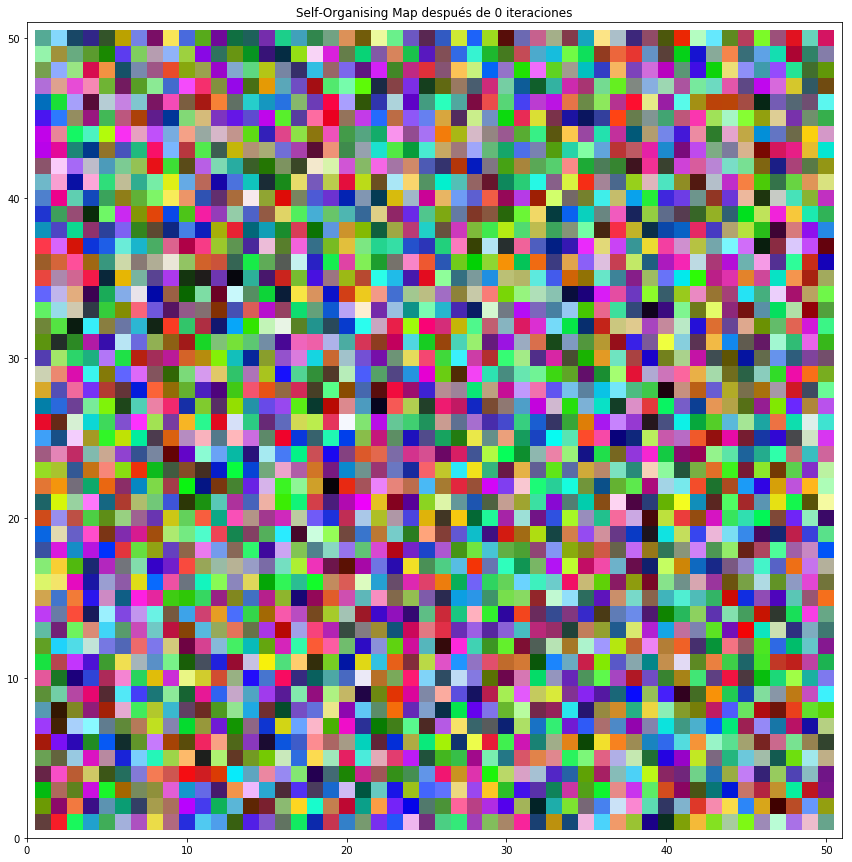

COMIENZA ENTRENAMIENTO...

Iteración: 100
Iteración: 200
Iteración: 300
Iteración: 400
Iteración: 500
Iteración: 600
Iteración: 700
Iteración: 800
Iteración: 900
Iteración: 1000
Iteración: 1100
Iteración: 1200
Iteración: 1300
Iteración: 1400
Iteración: 1500
Iteración: 1600
Iteración: 1700
Iteración: 1800
Iteración: 1900
Iteración: 2000
Iteración: 2100
Iteración: 2200
Iteración: 2300
Iteración: 2400
Iteración: 2500
Iteración: 2600
Iteración: 2700
Iteración: 2800
Iteración: 2900
Iteración: 3000
Iteración: 3100
Iteración: 3200
Iteración: 3300
Iteración: 3400
Iteración: 3500
Iteración: 3600
Iteración: 3700
Iteración: 3800
Iteración: 3900
Iteración: 4000
Iteración: 4100
Iteración: 4200
Iteración: 4300
Iteración: 4400
Iteración: 4500
Iteración: 4600
Iteración: 4700
Iteración: 4800
Iteración: 4900
Iteración: 5000
Iteración: 5100
Iteración: 5200
Iteración: 5300
Iteración: 5400
Iteración: 5500
Iteración: 5600
Iteración: 5700
Iteración: 5800
Iteración: 5900
Iteración: 6000
Iteración: 6100
Iterac

Iteración: 48800
Iteración: 48900
Iteración: 49000
Iteración: 49100
Iteración: 49200
Iteración: 49300
Iteración: 49400
Iteración: 49500
Iteración: 49600
Iteración: 49700
Iteración: 49800
Iteración: 49900
Iteración: 50000

MAPA ENTRENADO: 


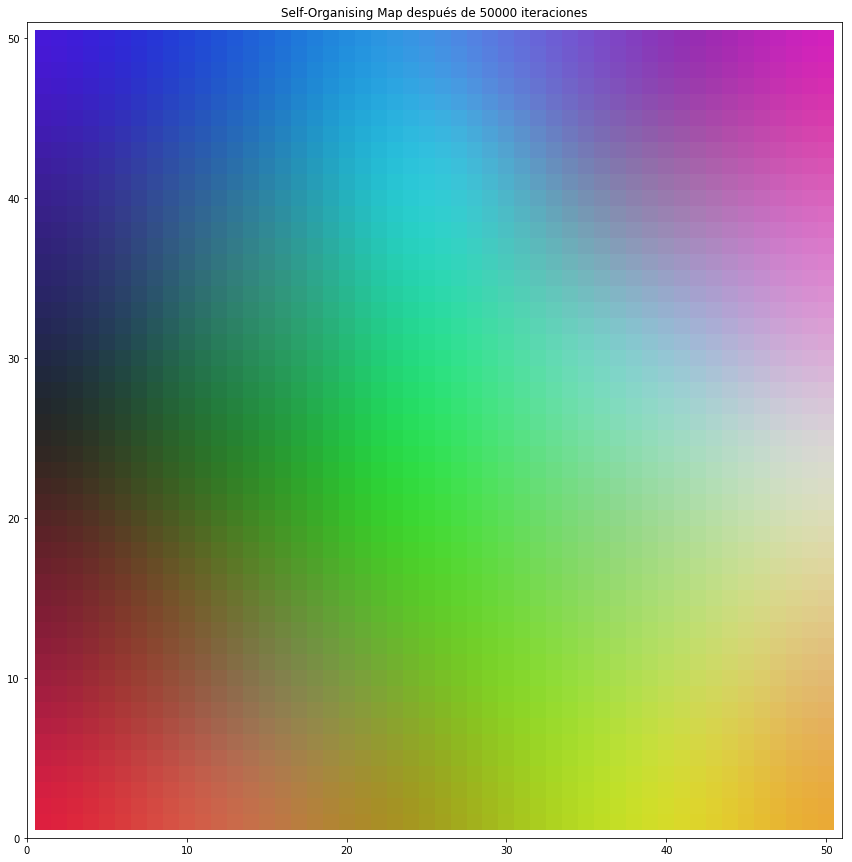


MATRIZ DE PESOS ENTRENADA: 
[[[0.86727877 0.12111468 0.24655757]
  [0.85300119 0.12016727 0.24932152]
  [0.83205681 0.12042409 0.25344552]
  ...
  [0.27192061 0.09921637 0.811455  ]
  [0.27428961 0.09866256 0.83231019]
  [0.27451612 0.09924274 0.84629148]]

 [[0.86703285 0.13379816 0.24155699]
  [0.85279938 0.13273529 0.24430067]
  [0.83184773 0.13268919 0.2486044 ]
  ...
  [0.25964978 0.10558311 0.81337782]
  [0.26155941 0.1049126  0.83416213]
  [0.2618363  0.10556466 0.84797097]]

 [[0.86472314 0.15216318 0.237137  ]
  [0.85065676 0.15091386 0.23955267]
  [0.83001022 0.15030006 0.24367333]
  ...
  [0.24244293 0.11551024 0.81406049]
  [0.2435278  0.11459288 0.83435538]
  [0.2438208  0.11517599 0.84782101]]

 ...

 [[0.91092829 0.69427053 0.20202688]
  [0.90906646 0.69520541 0.21696986]
  [0.90613374 0.6981729  0.23756456]
  ...
  [0.79544658 0.16517398 0.70567088]
  [0.79006736 0.14969167 0.72169685]
  [0.78470593 0.13937213 0.73395422]]

 [[0.91426618 0.67720709 0.20614918]
  [0.912

MemoryError: 

In [56]:
# Entrena la red con el dataset de entrenamiento

# Pasos previos
bmu = np.array([])

print("")
print("MAPA SIN ENTRENAR: ")

# Imprimimos la matriz de pesos al comienzo.
pintar_mapa(matriz_pesos, True, True, '0', 0)

print("COMIENZA ENTRENAMIENTO...")
print("")

# Hacemos tantas presentaciones como diga el periodo. 
for numPresentacion in range(1, periodo + 1):
    
    # Impresión de la iteración cada 100
    if numPresentacion % 100 == 0 :
        print("Iteración: " + str(numPresentacion))        
    
    if (sacar_video is True) :
        
        # Configuración de los fragmentos del vídeo
        if numPresentacion < seccion1_iteracion_max :
            if numPresentacion % seccion1_rango_foto == 0:
                pintar_mapa(matriz_pesos, False, True, str(numPresentacion), numPresentacion)

        elif numPresentacion < seccion2_iteracion_max :
            if numPresentacion % seccion2_rango_foto == 0:
                pintar_mapa(matriz_pesos, False, True, str(numPresentacion), numPresentacion)  

        elif numPresentacion < seccion3_iteracion_max :
            if numPresentacion % seccion3_rango_foto == 0:
                pintar_mapa(matriz_pesos, False, True, str(numPresentacion), numPresentacion)         

        elif numPresentacion < seccion4_iteracion_max :
            if numPresentacion % seccion4_rango_foto == 0:
                pintar_mapa(matriz_pesos, False, True, str(numPresentacion), numPresentacion)         
    
    # Selección de un patrón aleatorio
    presentacion = datos[np.random.randint(0, num_colores -1)]
    
    # Cálculo de bmu
    bmu = calcular_bmu(presentacion, matriz_pesos, num_entradas)
    
    # Cálculo de eta
    eta = variacion_learning_rate(learning_rate, numPresentacion, periodo)
    
    # Cálculo de v
    v = variacion_vecindario(vecindario, numPresentacion, periodo)
    
    # Reajuste de pesos
    for x in range(0, matriz_pesos.shape[0]):
        # Recorro el eje x
        for y in range(0, matriz_pesos.shape[1]):    
            # Recorro el eje y
            if calcular_distancia_puntos([x, y], bmu[1]) <= vecindario:
                # Si estamos dentro del vecindario, ajustamos los pesos
                matriz_pesos[x][y] = matriz_pesos[x][y] + eta * decay(calcular_distancia_puntos([x, y], bmu[1]), v) * (presentacion - matriz_pesos[x][y])   
    
print("")
print("MAPA ENTRENADO: ")

pintar_mapa(matriz_pesos, True, True, 'final', periodo)

print("")
print("MATRIZ DE PESOS ENTRENADA: ")
print(matriz_pesos)

if (sacar_video is True):
    
    crear_video()

    HTML("""
        <video width="400" height="400" controls>
          <source src="test.mp4" type="video/mp4">
        </video>
    """)

MemoryError: 

## SOM Clasificación

In [ ]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada

# Inicialización de las estructuras de datos necesarias para la clasificación
mapa_clasificacion = np.copy(matriz_pesos) * 0
mapa_activaciones = np.zeros((lado_mapa, lado_mapa), dtype=int)
mapa_distancias = np.zeros((lado_mapa, lado_mapa), dtype=float)

# Recorremos todo el array de datos para classificarlo
for patron in range(0, datos.shape[0]):
    
    # Calculamos bmu
    bmu = calcular_bmu(datos[patron], matriz_pesos, num_entradas)
    
    # Coordenadas de la bmu
    bmu_coordenadas = bmu[1]
    bmu_x = bmu_coordenadas[0]
    bmu_y = bmu_coordenadas[1]
    
    print("Encontrado en: (" + str(bmu_x) + ", " + str(bmu_y + 1) + ")")
    
    # Pesos de la bmu
    bmu_pesos = bmu[0]
    
    # Actualización de los mapas de clasficicación
    mapa_clasificacion[bmu_x][bmu_y] = bmu_pesos
    
    # Sumamos 1 al número de activaciones de la neurona
    mapa_activaciones[bmu_x][bmu_y] += 1
    
    # Acumulamos las distancias calculadas
    mapa_distancias[bmu_x][bmu_y] += calcular_distancia_vector(datos[patron], matriz_pesos[bmu_x][bmu_y])

# Número de patrones reconocidos (número de neuronas que han reconocido algún patrón)  
num_activaciones = np.count_nonzero(mapa_activaciones != 0)

# Cuidado con la activación = 0 en la división
mapa_activaciones[mapa_activaciones == 0] = -1  

# Dividimos la aculumación de distancias entre el número de activaciones
mapa_distancias = np.absolute(mapa_distancias / mapa_activaciones)    

# Volvemos a cambiar los -1 a 0
mapa_activaciones[mapa_activaciones == -1] = 0  

# Media de distancias de todo el mapa (solo las neuronas que han reconocido algún patrón!!)
media_distancias = np.sum(mapa_distancias) / num_activaciones

print("\n LADO : \n") 
print("> " + str(lado_mapa))

print("\n PERIODO : \n") 
print("> " + str(periodo))

print("\n NÚMERO DE ACTIVACIONES : \n") 
print("> " + str(num_activaciones))

print("\n MEDIA DISTANCIAS : \n") 
print("> " + str(media_distancias))
    
print("\n MAPA DE CLASIFICACIÓN: \n")      
pintar_mapa(mapa_clasificacion, True, False, '-', periodo)

print("\n MAPA DE ACTIVACIÓN: \n") 
print(mapa_activaciones)

print("\n MAPA DE DISTANCIAS MEDIAS: \n") 
print(mapa_distancias)

## SOM Prueba

In [ ]:
# Clasifica nuevos patrones
mapa_clasificacion = np.copy(matriz_pesos) * 0
mapa_clasificacion_color = np.copy(matriz_pesos) * 0

mapa_activaciones = np.zeros((lado_mapa, lado_mapa), dtype=int)
mapa_distancias = np.zeros((lado_mapa, lado_mapa), dtype=float)

# Color en formato (255, 255, 255)
colores_a_clasificar = np.array([[255, 255, 255], [255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [0, 255, 255]])

for i in range(0, colores_a_clasificar.shape[0]):

    # Sacamos un color
    color = colores_a_clasificar[i]
    
    # Calculamos bmu
    bmu = calcular_bmu(normalizar_color(color), matriz_pesos, num_entradas)

    # Coordenadas de la bmu
    bmu_coordenadas = bmu[1]
    bmu_x = bmu_coordenadas[0]
    bmu_y = bmu_coordenadas[1]

    # Pesos de la bmu
    bmu_pesos = bmu[0]

    # Actualización del mapa de clasificación (dibuja la clase en el lugar de la clase correspondiente según la matriz de pesos)
    mapa_clasificacion[bmu_x][bmu_y] = bmu_pesos
    
    # Actualización del mapa de clasificación (dibuja el color presentado a la red en el lugar de la clase correspondiente)
    mapa_clasificacion_color[bmu_x][bmu_y] = normalizar_color(color)
    
    # Sumamos 1 al número de activaciones de la neurona
    mapa_activaciones[bmu_x][bmu_y] += 1
    
    # Acumulamos las distancias calculadas
    mapa_distancias[bmu_x][bmu_y] += calcular_distancia_vector(datos[patron], matriz_pesos[bmu_x][bmu_y])

    print("Encontrado en: (" + str(bmu_x) + ", " + str(bmu_y + 1) + ")")
    
# Número de patrones reconocidos (número de neuronas que han reconocido algún patrón)   
num_activaciones = np.count_nonzero(mapa_activaciones != 0)

# Cuidado con la activación = 0 en la división
mapa_activaciones[mapa_activaciones == 0] = -1  

# Dividimos la aculumación de distancias entre el número de activaciones
mapa_distancias = np.absolute(mapa_distancias / mapa_activaciones)    

# Volvemos a cambiar los -1 a 0
mapa_activaciones[mapa_activaciones == -1] = 0  

# Media de distancias de todo el mapa (solo las neuronas que han reconocido algún patrón!!)
media_distancias = np.sum(mapa_distancias) / num_activaciones

print("\n LADO : \n") 
print("> " + str(lado_mapa))

print("\n PERIODO : \n") 
print("> " + str(periodo))

print("\n NÚMERO DE ACTIVACIONES : \n") 
print("> " + str(num_activaciones))

print("\n MEDIA DISTANCIAS : \n") 
print("> " + str(media_distancias))

print("\n MAPA DE ACTIVACIÓN: \n") 
print(mapa_activaciones)

print("\n MAPA DE DISTANCIAS MEDIAS: \n") 
print(mapa_distancias)
    
print("\n MAPA DE CLASIFICACIÓN (MATRIZ DE PESOS): \n")      
pintar_mapa(mapa_clasificacion, True, True, 'clasificacion', periodo)

print("\n MAPA DE CLASIFICACIÓN (COLOR SELECCIONADO): \n")   
pintar_mapa(mapa_clasificacion_color, True, True, 'clasificacion_color', periodo)
